# MSA 2025 Phase 2 - Part 1

In [405]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [406]:
# Load the dataset
file_path = './datasets/X store sales/store_sales.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Display all data
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# See first 10 rows
print(df.head(n=10))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
5      24  US-2017-156909   7/16/2017   7/18/2017    Second Class    SF-20065   
6      25  CA-2015-106320   9/25/2015   9/30/2015  Standard Class    EB-13870   
7      28  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
8      30  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
9      37  CA-2016-117590   12/8/2016  12/10/2016     First Class    GH-14485   

     Customer Name    Segment        Country             City         State  \
0      Claire Gute   Consumer

In [407]:
# Get info on dataset
print(df.shape)
df.info()

# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# See converted data
print(df['Order Date'].dtype)
print(df['Order Date'].head())

(2121, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 1

In [408]:
# Generate statistics on numeric variables
print(df.describe())

# See number of unique values
print(df.nunique())

            Row ID                     Order Date  \
count  2121.000000                           2121   
mean   5041.643564  2016-04-30 03:54:13.748231680   
min       1.000000            2014-01-06 00:00:00   
25%    2568.000000            2015-05-26 00:00:00   
50%    5145.000000            2016-06-20 00:00:00   
75%    7534.000000            2017-05-14 00:00:00   
max    9991.000000            2017-12-30 00:00:00   
std    2885.740258                            NaN   

                           Ship Date   Postal Code        Sales     Quantity  \
count                           2121   2121.000000  2121.000000  2121.000000   
mean   2016-05-04 01:54:44.299858432  55726.556341   349.834887     3.785007   
min              2014-01-10 00:00:00   1040.000000     1.892000     1.000000   
25%              2015-05-31 00:00:00  22801.000000    47.040000     2.000000   
50%              2016-06-23 00:00:00  60505.000000   182.220000     3.000000   
75%              2017-05-18 00:00:00  9003

To better understand the data, we print out a list of unique values for variables with few uniques, that are not already obvious such as the state

In [409]:
# Print unique values for variables with few uniques
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Region'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())
print(np.sort(df['Discount'].unique()))

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'East' 'Central']
['Furniture']
['Bookcases' 'Chairs' 'Tables' 'Furnishings']
[0.   0.1  0.15 0.2  0.3  0.32 0.4  0.45 0.5  0.6  0.7 ]


In [410]:
# See relationship between customer ID and Customer Name
print(df[['Customer ID', 'Customer Name']].drop_duplicates().head(10))
print(f"Number of unique ID and name combination is: {len(df[['Customer ID', 'Customer Name']].drop_duplicates())}")

# Print max number of customer names for each ID
print(df.groupby('Customer ID')['Customer Name'].nunique().reset_index().sort_values(by='Customer Name', ascending=False).head(10))


   Customer ID    Customer Name
0     CG-12520      Claire Gute
2     SO-20335   Sean O'Donnell
3     BH-11710  Brosina Hoffman
5     SF-20065  Sandra Flanagan
6     EB-13870      Emily Burns
7     TB-21520  Tracy Blumstein
9     GH-14485        Gene Hale
10    SN-20710     Steve Nguyen
12    DP-13000    Darren Powers
14    TB-21055  Ted Butterfield
Number of unique ID and name combination is: 707
    Customer ID  Customer Name
706    ZD-21925              1
0      AA-10315              1
1      AA-10375              1
667    TG-21310              1
668    TG-21640              1
669    TH-21100              1
670    TH-21115              1
671    TH-21235              1
672    TH-21550              1
673    TM-21010              1


Seems like for each customer, one unique ID is assigned. In this dataset, no customer with the same name so unique name = ID.

In [411]:
# Product ID and Product Name does not seem to be one-to-one
print(df[['Product ID', 'Product Name']].drop_duplicates().head(10))
print(f"Number of unique ID and name combination is: {len(df[['Product ID', 'Product Name']].drop_duplicates())}")

# Print max number of Product Name for each ID, and max ID for each name
print(df.groupby('Product ID')['Product Name'].nunique().reset_index().sort_values(by='Product Name', ascending=False).head(10))
print(df.groupby('Product Name')['Product ID'].nunique().reset_index().sort_values(by='Product ID', ascending=False).head(10))

         Product ID  \
0   FUR-BO-10001798   
1   FUR-CH-10000454   
2   FUR-TA-10000577   
3   FUR-FU-10001487   
4   FUR-TA-10001539   
5   FUR-CH-10002774   
7   FUR-BO-10004834   
8   FUR-FU-10004848   
9   FUR-FU-10003664   
10  FUR-BO-10002545   

                                                        Product Name  
0                                  Bush Somerset Collection Bookcase  
1        Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back  
2                      Bretford CR4500 Series Slim Rectangular Table  
3   Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood  
4                           Chromcraft Rectangular Conference Tables  
5                                 Global Deluxe Stacking Chair, Gray  
7      Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish  
8     Howard Miller 13-3/4" Diameter Brushed Chrome Round Wall Clock  
9                Electrix Architect's Clamp-On Swing Arm Lamp, Black  
10           Atlantic Metals Mobile 

For 8 product IDs, they refer to two different product names.

For 3 identical product names, they contain 2 different IDs

In [412]:
# See product ID and names for the 8 product IDs with two names
product_ID_name = df.groupby('Product ID')['Product Name'].nunique()
multiple_names_ID = product_ID_name[product_ID_name > 1].index
for product_id in multiple_names_ID:
    print(f"Product ID: {product_id}")
    print(df[df['Product ID'] == product_id]['Product Name'].drop_duplicates())
    print("----------------------")


# See product name with multiple IDs
print("===================")
product_name_ID = df.groupby('Product Name')['Product ID'].nunique()
multiple_ID_name = product_name_ID[product_name_ID > 1].index
for product_name in multiple_ID_name:
    print(f"Product Name: {product_name}")
    print(df[df['Product Name'] == product_name]['Product ID'].drop_duplicates())
    print("----------------------")

Product ID: FUR-BO-10002213
436               DMI Eclipse Executive Suite Bookcases
512    Sauder Forest Hills Library, Woodland Oak Finish
Name: Product Name, dtype: object
----------------------
Product ID: FUR-CH-10001146
16    Global Value Mid-Back Manager's Chair, Gray
30                       Global Task Chair, Black
Name: Product Name, dtype: object
----------------------
Product ID: FUR-FU-10001473
305                                   DAX Wood Document Frame
456    Eldon Executive Woodline II Desk Accessories, Mahogany
Name: Product Name, dtype: object
----------------------
Product ID: FUR-FU-10004017
51     Tenex Contemporary Contur Chairmats for Low and Medium Pile Carpet, Computer, 39" x 49"
797                                              Executive Impressions 13" Chairman Wall Clock
Name: Product Name, dtype: object
----------------------
Product ID: FUR-FU-10004091
62     Howard Miller 13" Diameter Goldtone Round Wall Clock
289                 Eldon 200 Class Desk Acces

In [413]:
# Print entire rows for multiple names ID
for product_id in multiple_names_ID:
    print(df[df['Product ID'] == product_id].sort_values(by='Order Date', ascending=True))
    print("----------------------")

# Print rows for multiple ID names
print("===================")
for product_name in multiple_ID_name:
    print(df[df['Product Name'] == product_name].sort_values(by='Order Date', ascending=True))
    print("----------------------")

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1994    9396  CA-2014-125997 2014-09-20 2014-09-23     First Class   
1365    6536  CA-2014-128209 2014-11-17 2014-11-22  Standard Class   
582     2809  CA-2015-148635 2015-07-25 2015-07-27    Second Class   
1233    5919  US-2015-126977 2015-09-17 2015-09-23  Standard Class   
436     2116  CA-2015-164882 2015-10-31 2015-10-31        Same Day   
1856    8713  US-2015-145422 2015-12-03 2015-12-07  Standard Class   
512     2472  US-2016-135923 2016-01-22 2016-01-28  Standard Class   
2047    9650  CA-2016-107104 2016-11-26 2016-11-30  Standard Class   
2033    9584  CA-2017-116127 2017-06-25 2017-06-27    Second Class   
1051    5080  US-2017-133312 2017-11-25 2017-11-29  Standard Class   

     Customer ID        Customer Name   Segment        Country           City  \
1994    MW-18220         Mitch Webber  Consumer  United States  New York City   
1365    GT-14710            Greg Tran  Consumer  United States     

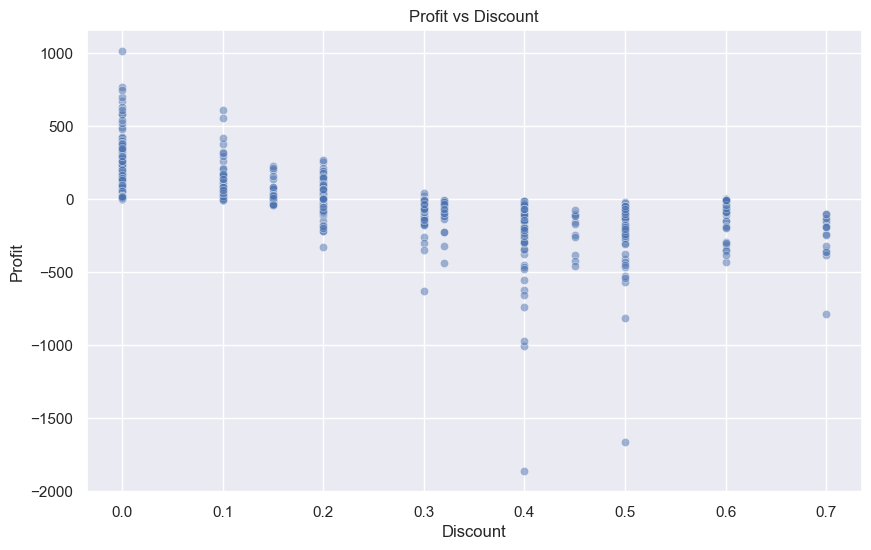

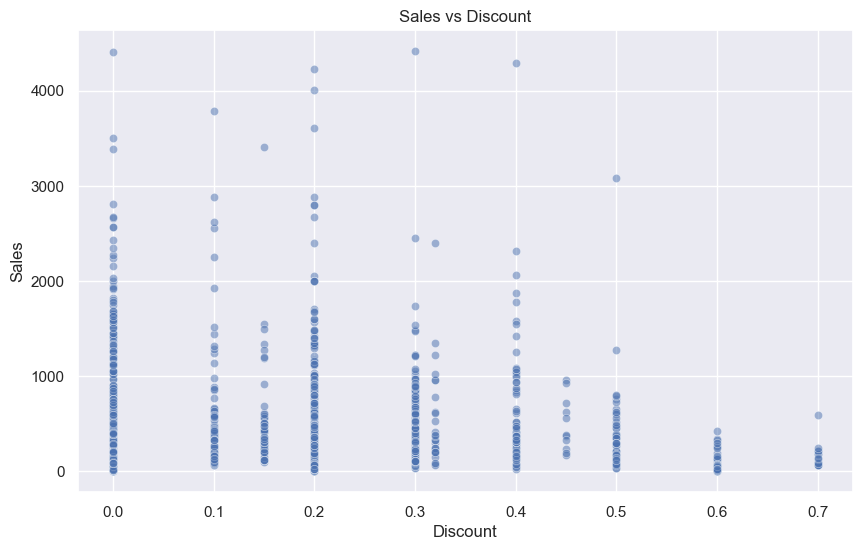

In [414]:
# See how discount relates to profit
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# See how discount relates to sales
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Discount', y='Sales', data=df, alpha=0.5)
plt.title('Sales vs Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

### Discount is between 0 and 0.7, higher discount generally leads to lower profit.

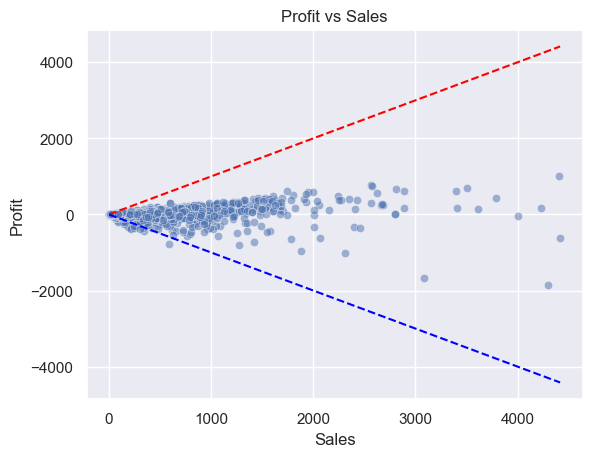

In [415]:
# Find out how sales relate to profit
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.5)
plt.title('Profit vs Sales') 

# See if sales can be lower than profit, using a gradient of sales = profit and sales = -profit
x = np.linspace(df['Sales'].min(), df['Sales'].max(), 100)
plt.plot(x, x, color='red', linestyle='--', label='Sales = Profit')
plt.plot(x, -x, color='blue', linestyle='--', label='Sales = -Profit')
plt.xlabel('Sales')  

plt.show()


### Dots underneath the blue line indicate that sales can be lower than profit, only possible if the sales column have discount already applied.

In [416]:
# See how many unique cities there are
unique_cities = df['City'].nunique()
print(unique_cities)

# See unique states
unique_states = df['State'].nunique()
print(unique_states)  

371
48


# Description of variables

Now, we know enough to provide a description of each variable

1. Row ID: A unique integer for each unique product in a purchase. 
2. Order ID: A unique ID for each purchase
3. Order Date: Date for when the order is placed
4. Ship Date: Date for when the order is shipped
5. Ship Mode: One of ['Second Class' 'Standard Class' 'First Class' 'Same Day']
6. Customer ID: Unique ID for each customer
7. Customer Name: Name of each customer
8. Segment: One of ['Consumer' 'Corporate' 'Home Office']
9. Country: Always United States
10. City: Name of city in the US
11. State: Name of state in the US
12. Postal Code: Integer representing postal code
13. Region: Region of the US classified as ['South' 'West' 'East' 'Central']
14. Product ID: The ID of the product purchased (Many to many to product name, not unique)
15. Category: Always furniture
16. Sub-Category: Sub-category for product.
17. Product Name: Name of product purchased
18. Sales: The price sold for this row after discount is applied, continuous data
19. Quantity: Integer for the amount of a product sold
20. Discount: Fraction of the original price that is discounted, ordinal
21. Profit: Profit for this row , continuous


Next step, we will convert relevant columns to numerical representations to feed into machine learning model
### convert data justification
Things like Order ID, row ID and customer ID/Name are unique IDs that rarely repeat, so encoding them does not make sense for data analysis.

Things like dates has already been converted to datetime format, can be further converted to a numerical format.

Things like ship mode, segment, region, are categorical variables, can be encoded using one-hot encoding.

Although product ID and names are categorical, too many unique categories compared to dataset size to categorize individually. (Also many-to-many relationship, needs to be cleaned up)

Sales, quantity, discount, profit is already numerical, no need to convert.

Postal code is integer, but is NOT ordinal, and also too specific. 

Cities and States can be converted to categorical, but don't want to add too many specific columns to avoid overfitting, also region is already included, don't need to convert.

In [417]:
# Keep a copy of the raw dataframe for later use
df_raw = df.copy()

In [418]:


# Convert dates to epoch time
df['Order Date'] = df['Order Date'].astype(int)
df['Ship Date'] = df['Ship Date'].astype(int)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Ship Mode', 'Segment', 'Region', 'Sub-Category'], dtype='int')    


In [419]:
# See dataset after preprocessing
print(df.head())

   Row ID        Order ID           Order Date            Ship Date  \
0       1  CA-2016-152156  1478563200000000000  1478822400000000000   
1       2  CA-2016-152156  1478563200000000000  1478822400000000000   
2       4  US-2015-108966  1444521600000000000  1445126400000000000   
3       6  CA-2014-115812  1402272000000000000  1402704000000000000   
4      11  CA-2014-115812  1402272000000000000  1402704000000000000   

  Customer ID    Customer Name        Country             City       State  \
0    CG-12520      Claire Gute  United States        Henderson    Kentucky   
1    CG-12520      Claire Gute  United States        Henderson    Kentucky   
2    SO-20335   Sean O'Donnell  United States  Fort Lauderdale     Florida   
3    BH-11710  Brosina Hoffman  United States      Los Angeles  California   
4    BH-11710  Brosina Hoffman  United States      Los Angeles  California   

   Postal Code       Product ID   Category  \
0        42420  FUR-BO-10001798  Furniture   
1        424

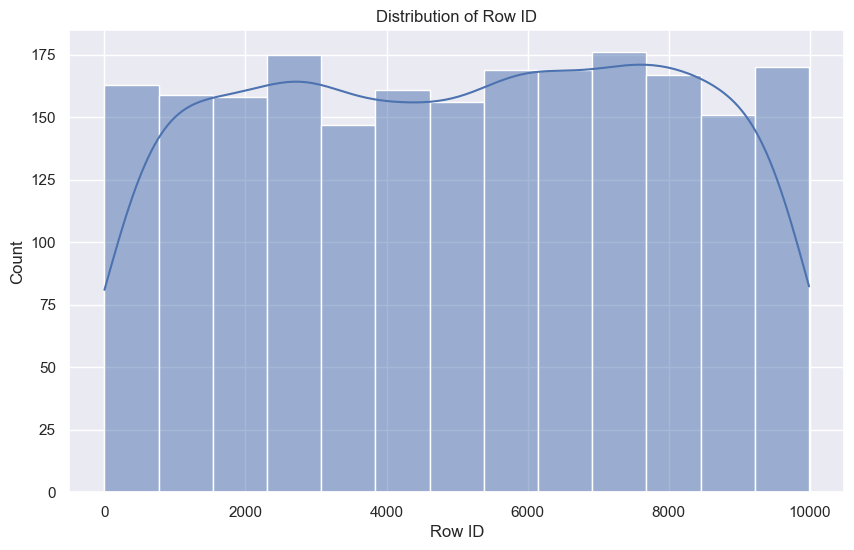

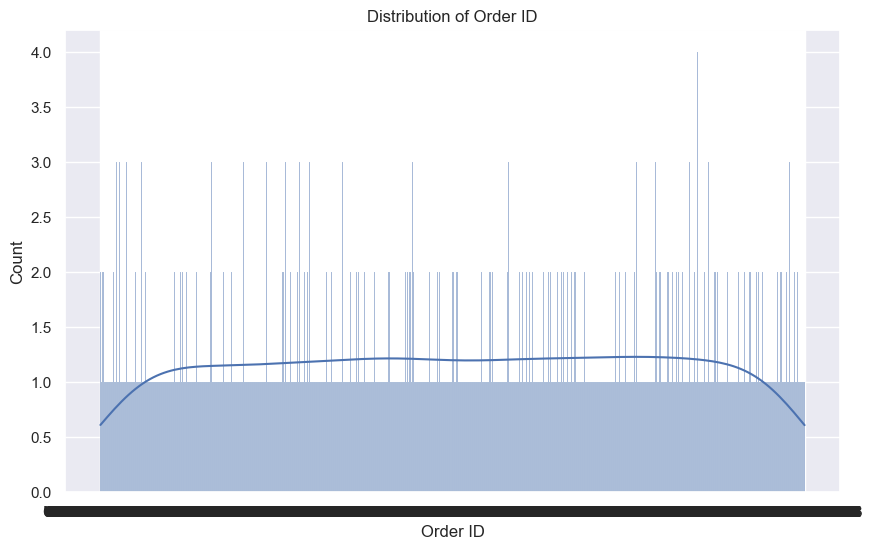

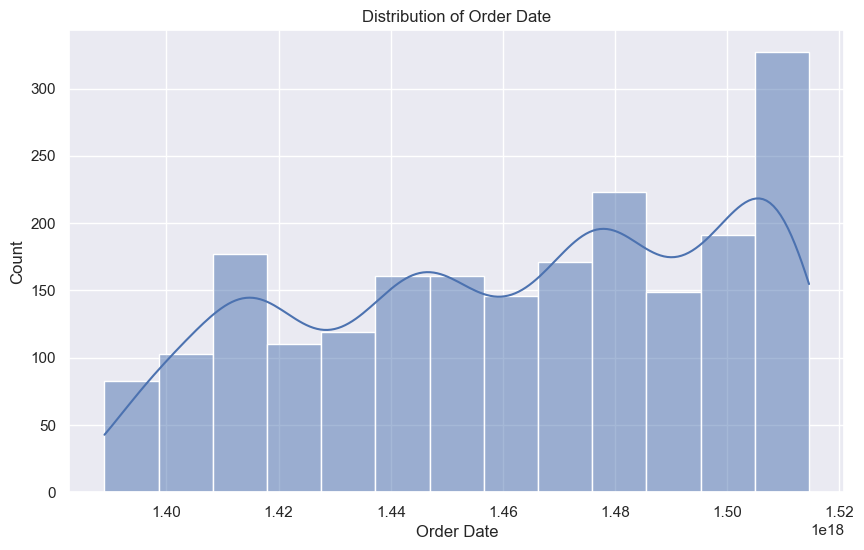

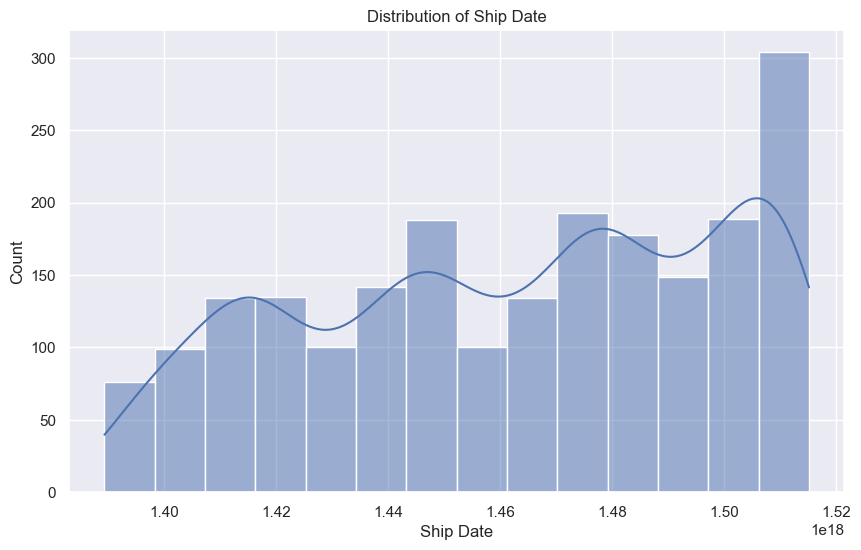

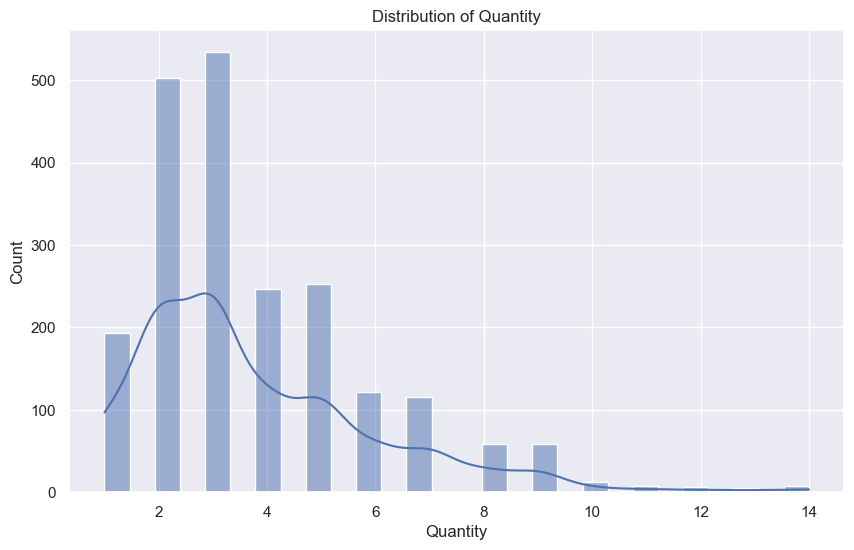

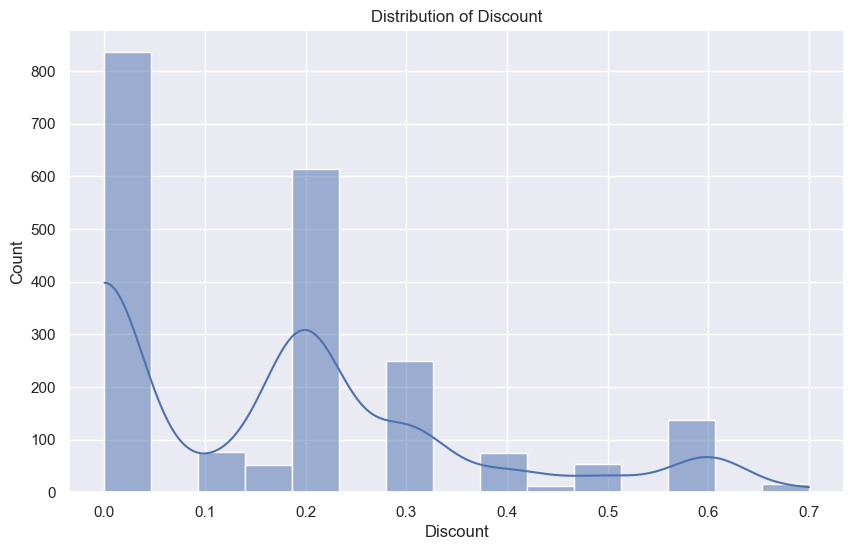

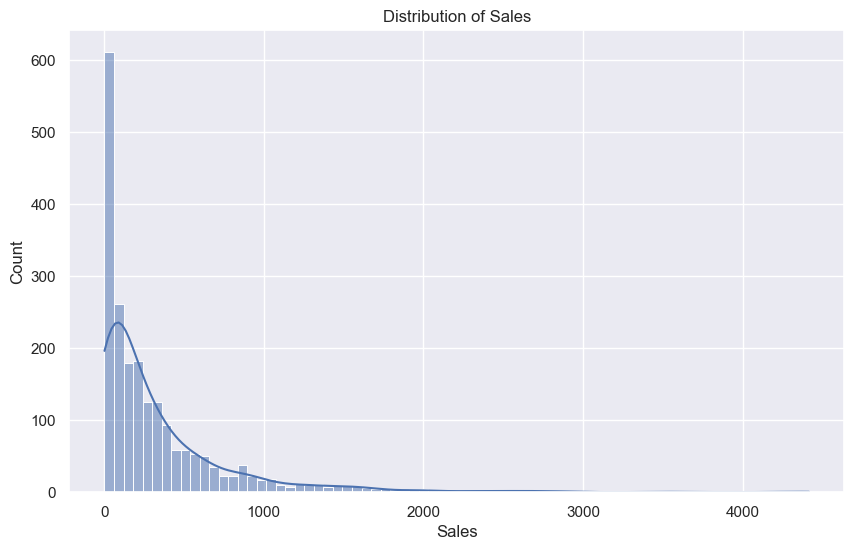

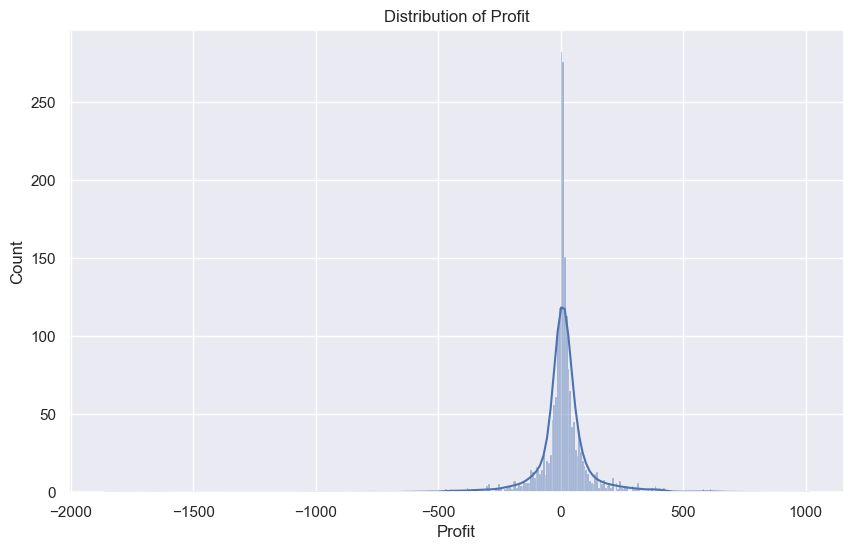

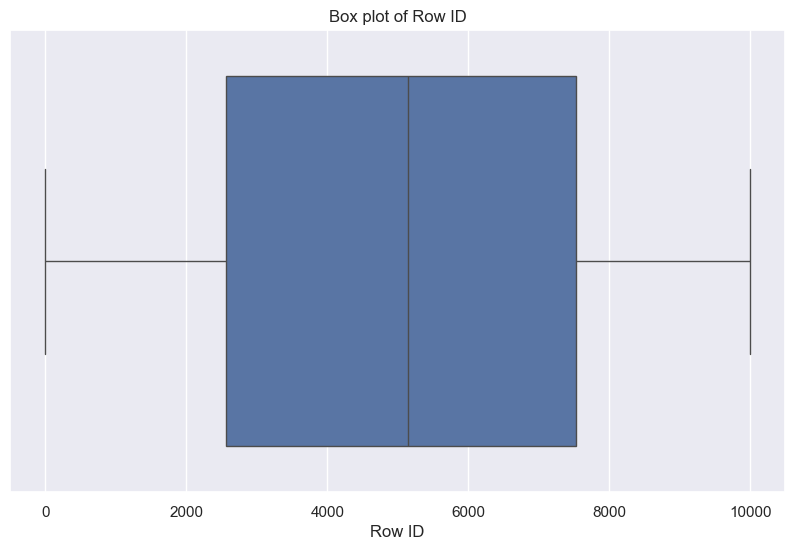

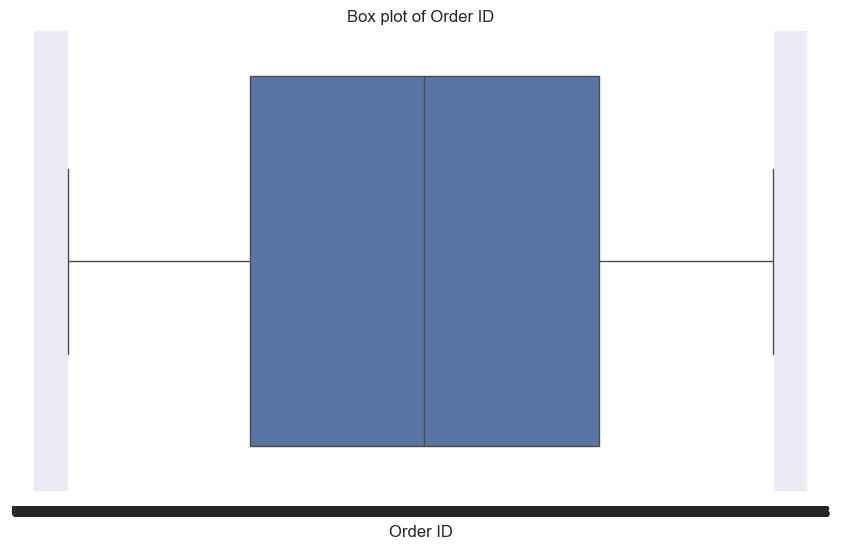

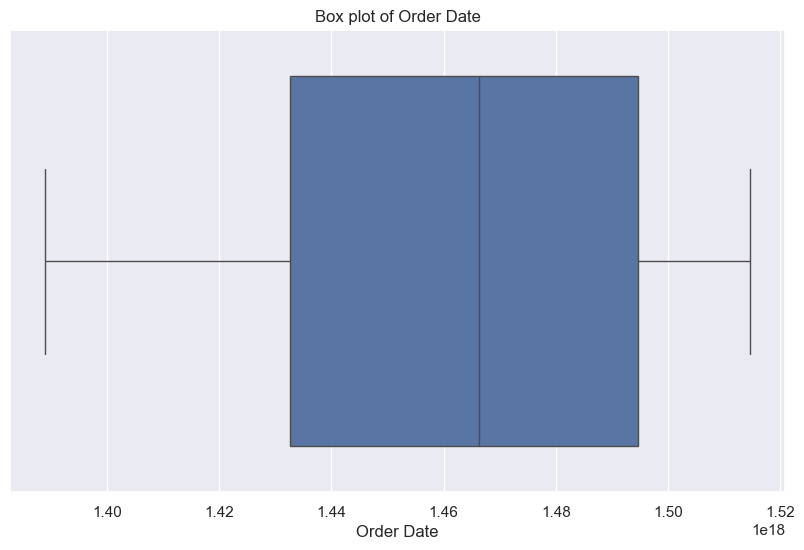

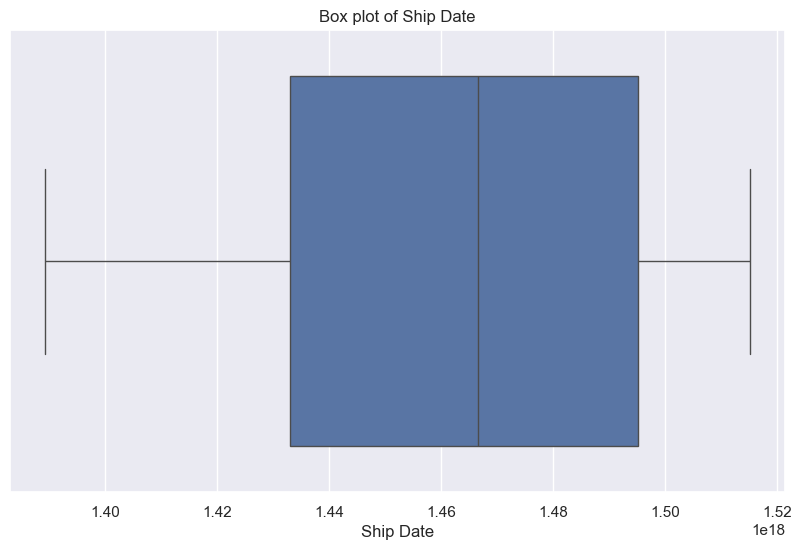

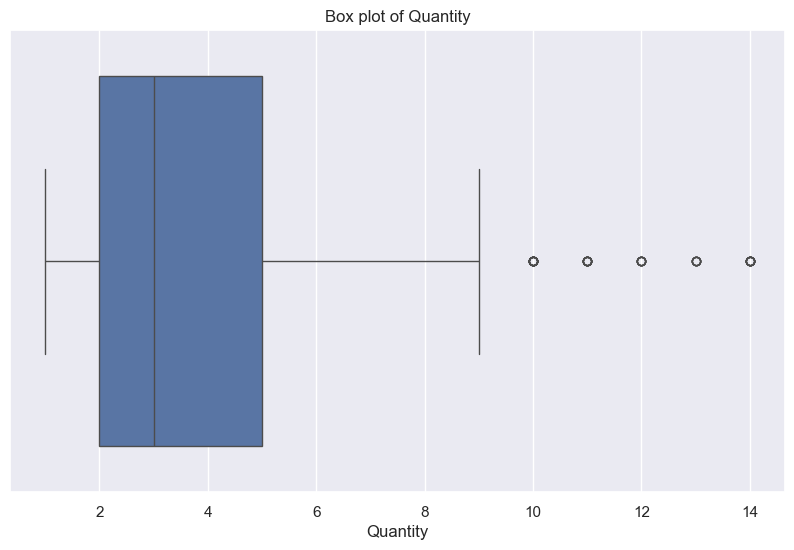

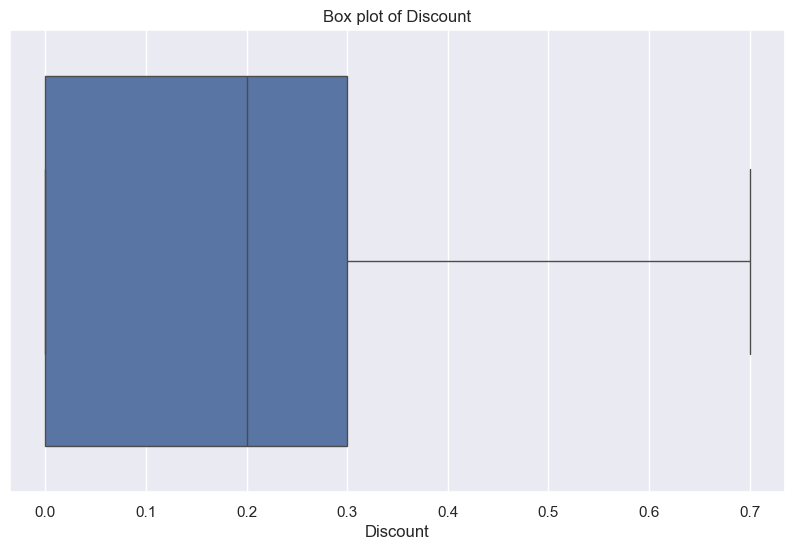

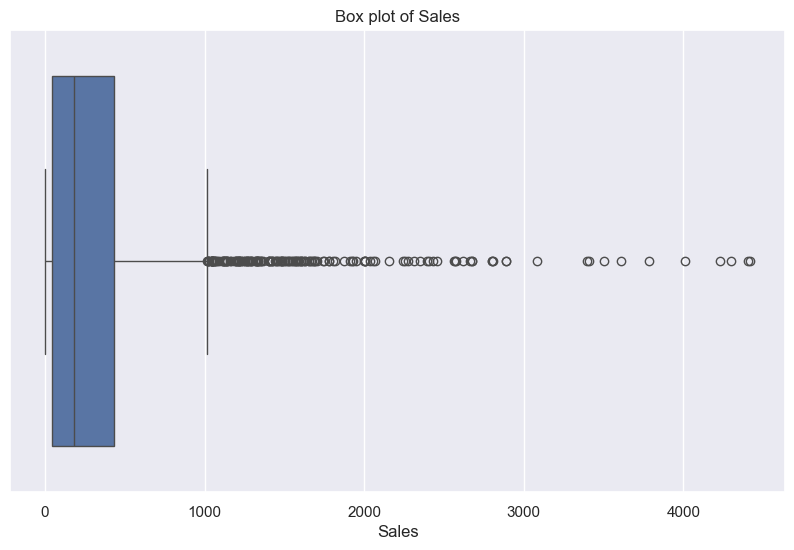

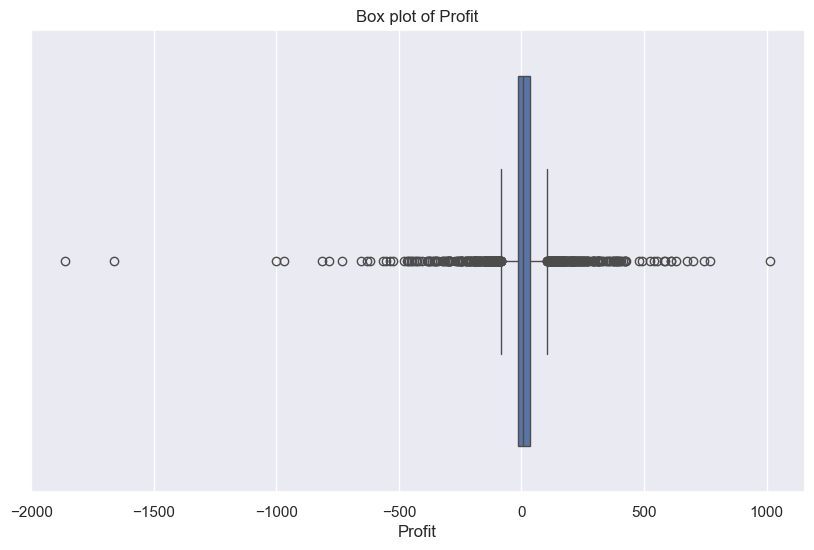

In [420]:
# Visualize distribution of key variables
numeric_cols = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Quantity', 'Discount', 'Sales', 'Profit']

# Set seaborn theme
sns.set_theme(style="darkgrid")

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Box plots
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

## 2. Clean data

Since the dataset does not contain missing values, don't have to handle these cases.

We can clean the data by getting rid of extreme outlier and remove rows that don't make sense. 

To remove outliers, we drop the top 5 rows by sales, top 5 rows by profit, bottom 5 rows by profit (since profit can be negative). We also remove orders with more than 10 quantities, since it is very rare.

In [421]:
# Get rows with extreme outliers
outliers = df[(df['Sales'].rank(ascending=False) <= 5) |
              (df['Profit'].rank(ascending=False) <= 5) |
                (df['Profit'].rank(ascending=True) <= 5) |
                (df['Quantity'] > 10)]
print(len(outliers))

# Remove outliers from the dataset
df = df.drop(index=outliers.index)



39


In [422]:
# See how many rows are left after removing outliers
print(df.shape)

(2082, 32)


Since the profit is approximately normal, we can use standardization. For the sales data, large right-skew means taking the log is appropriate. For the rest of the numerical columns, normalization is applied to keep it in the same scale.

In [423]:
# Using standar scaler to standardize the profit

# Import StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the numeric columns
df['Profit'] = standard_scaler.fit_transform(df[['Profit']])


# Apply log transformation to the Sales column
df['Sales'] = np.log1p(df['Sales'])  # log1p is used to handle zero values

# Standardize the Sales column
df['Sales'] = standard_scaler.fit_transform(df[['Sales']])

# Use normalization to scale the rest
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

# List columns to standardize
numeric_cols = ['Order Date', 'Ship Date', 'Quantity', 'Discount']

df[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])


In [424]:
# See how it looks like after standardization
print(df.head())

   Row ID        Order ID  Order Date  Ship Date Customer ID    Customer Name  \
0       1  CA-2016-152156    0.713008   0.711142    CG-12520      Claire Gute   
1       2  CA-2016-152156    0.713008   0.711142    CG-12520      Claire Gute   
2       4  US-2015-108966    0.441844   0.442916    SO-20335   Sean O'Donnell   
3       6  CA-2014-115812    0.105299   0.105227    BH-11710  Brosina Hoffman   
4      11  CA-2014-115812    0.105299   0.105227    BH-11710  Brosina Hoffman   

         Country             City       State  Postal Code       Product ID  \
0  United States        Henderson    Kentucky        42420  FUR-BO-10001798   
1  United States        Henderson    Kentucky        42420  FUR-CH-10000454   
2  United States  Fort Lauderdale     Florida        33311  FUR-TA-10000577   
3  United States      Los Angeles  California        90032  FUR-FU-10001487   
4  United States      Los Angeles  California        90032  FUR-TA-10001539   

    Category  \
0  Furniture   
1  Fur

Now, drop columns that are too specific and cannot be used to train a machine learning model if we want to avoid overfitting, or columns that are always the same and do not provide any information

In [425]:
# Drop columns
drop_columns = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Product ID', 'Category', 'Product Name']
df = df.drop(columns=drop_columns)

In [426]:
# See how it looks like
print(df.head())

   Order Date  Ship Date     Sales  Quantity  Discount    Profit  \
0    0.713008   0.711142  0.430629  0.111111  0.000000  0.299858   
1    0.713008   0.711142  1.142258  0.222222  0.000000  1.912241   
2    0.441844   0.442916  1.328581  0.444444  0.642857 -3.556618   
3    0.105299   0.105227 -0.723725  0.666667  0.000000  0.048072   
4    0.105299   0.105227  1.729256  0.888889  0.285714  0.693683   

   Ship Mode_First Class  Ship Mode_Same Day  Ship Mode_Second Class  \
0                      0                   0                       1   
1                      0                   0                       1   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Ship Mode_Standard Class  Segment_Consumer  Segment_Corporate  \
0                         0                 1                  0   
1                     

## 3. Visualise data

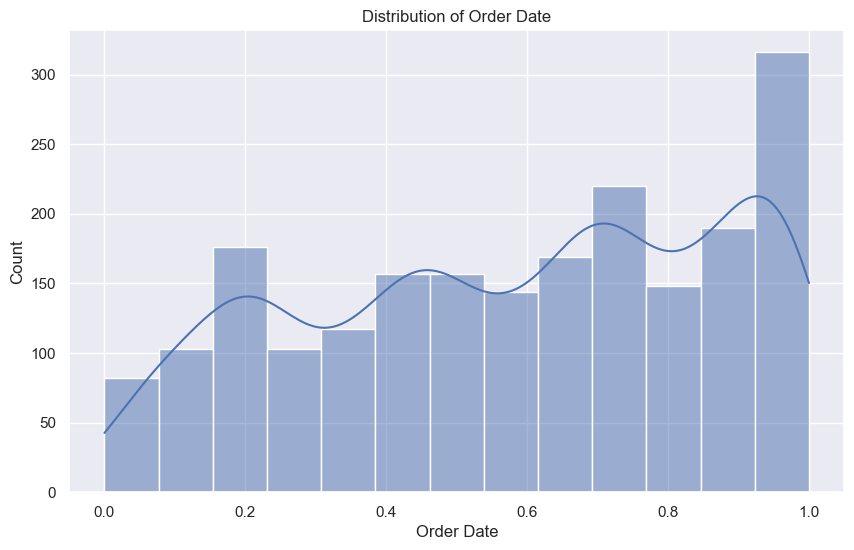

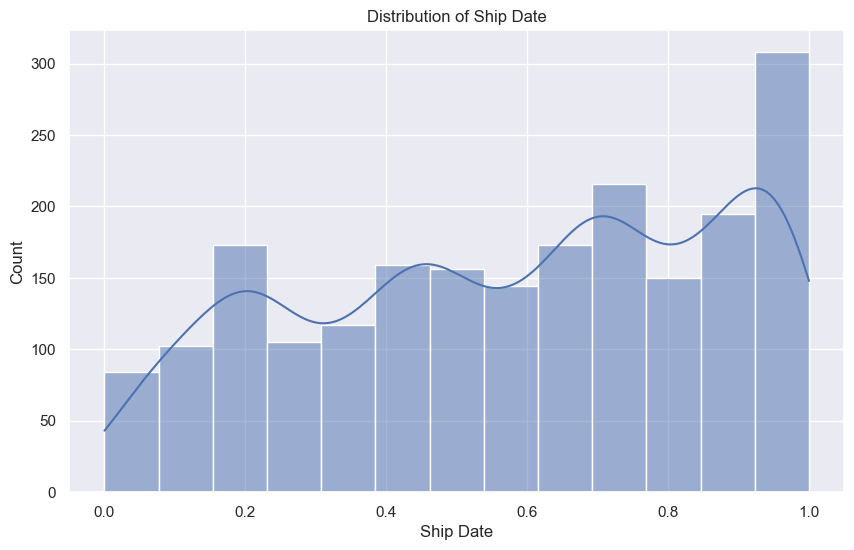

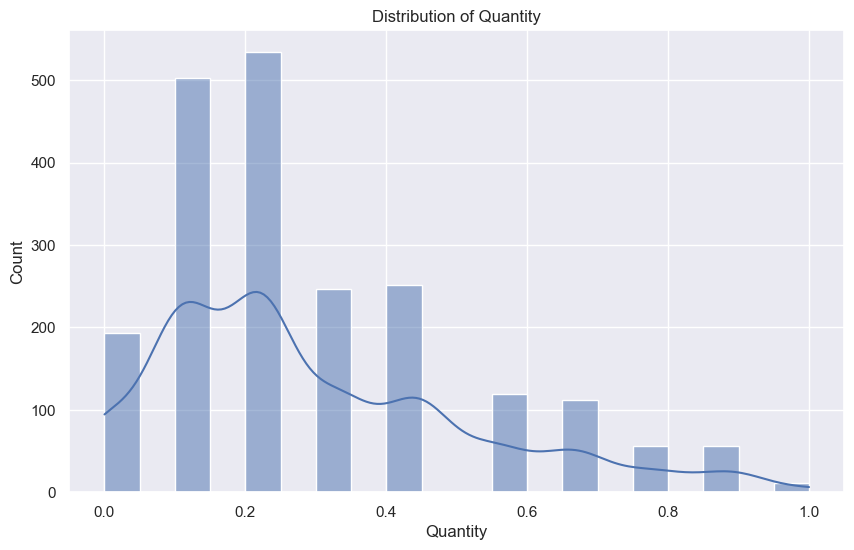

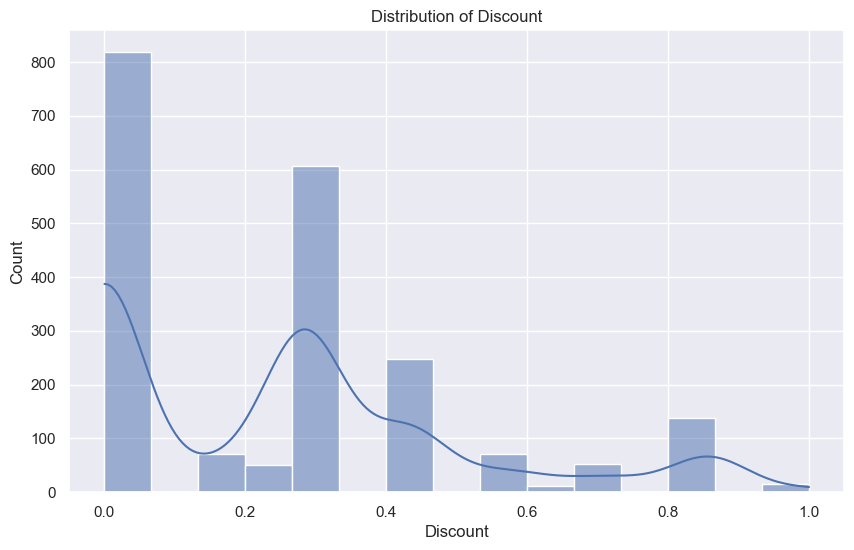

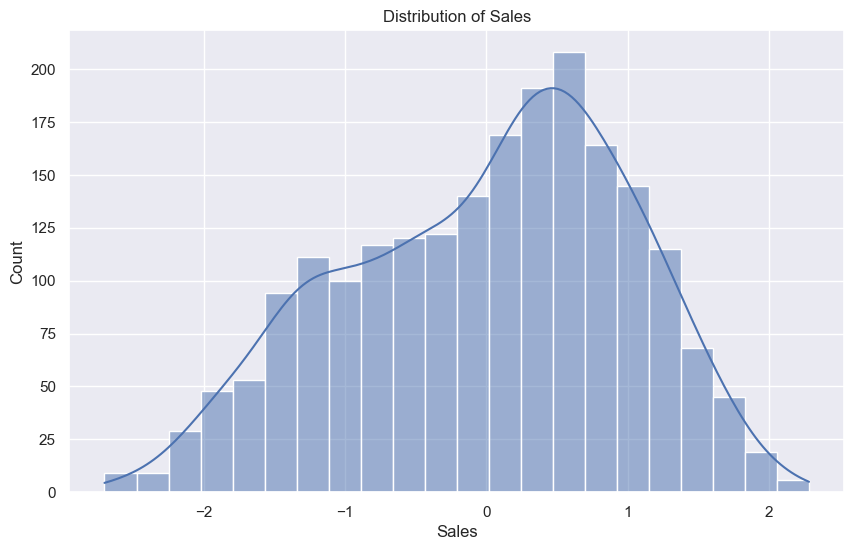

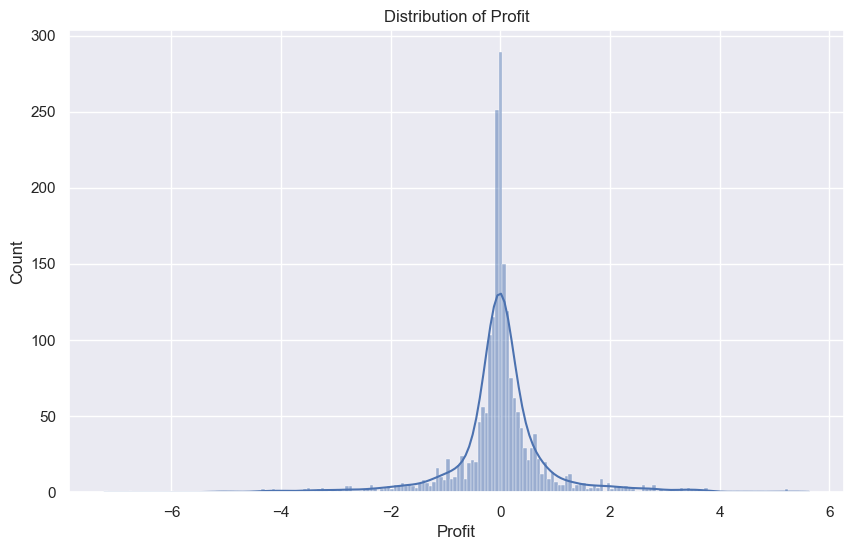

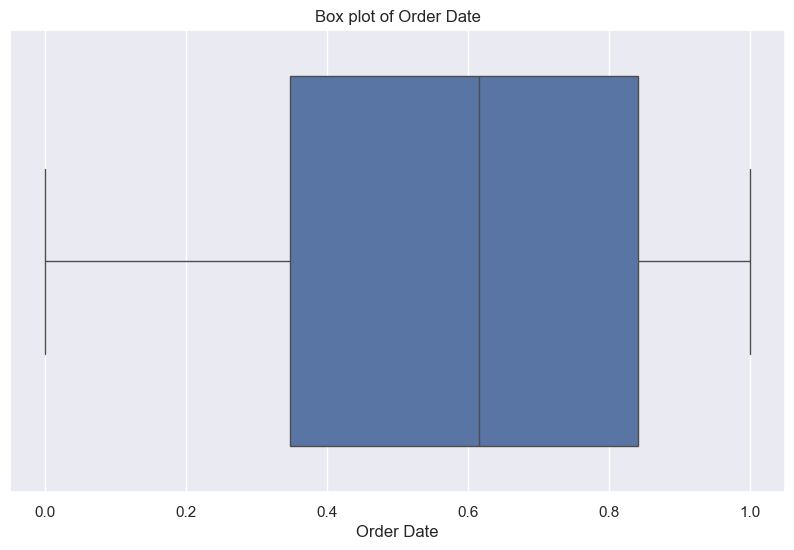

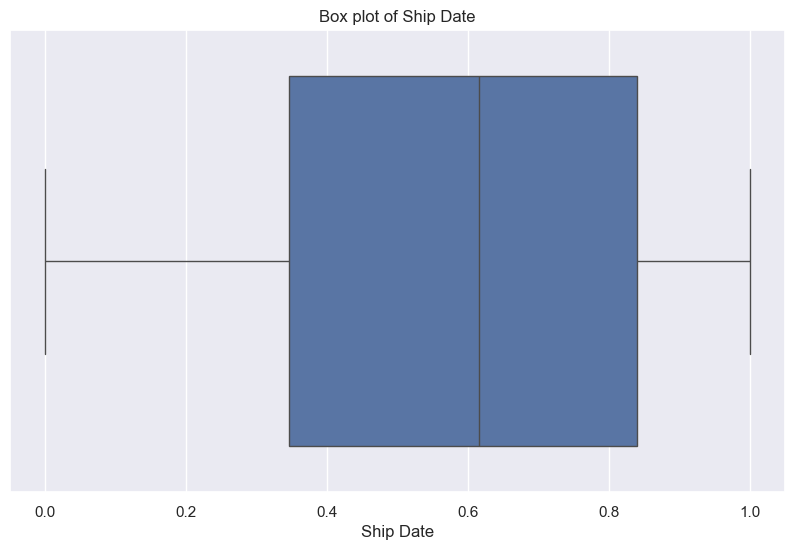

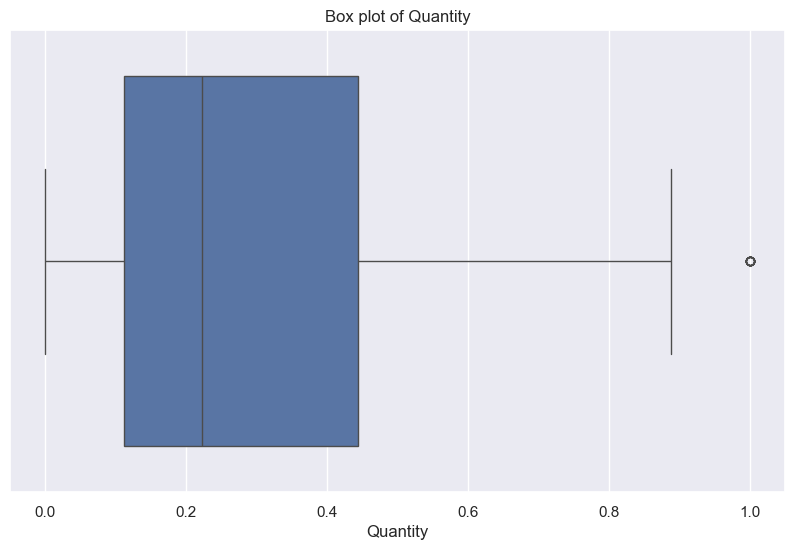

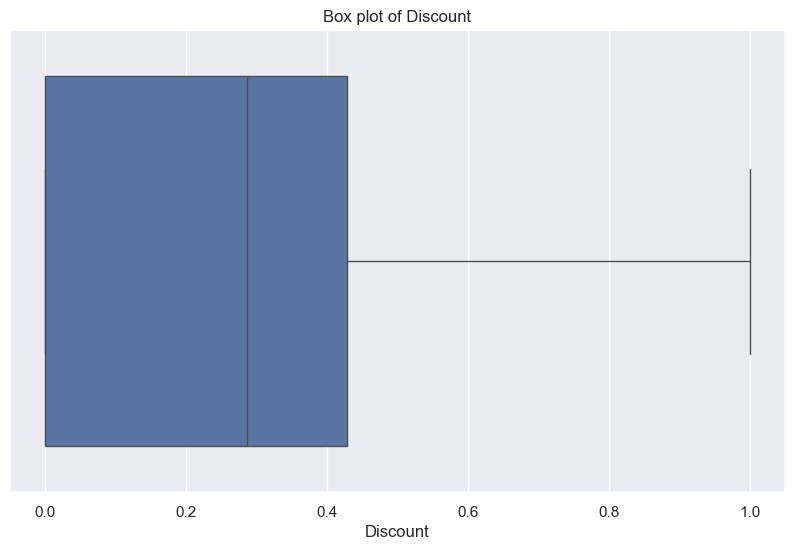

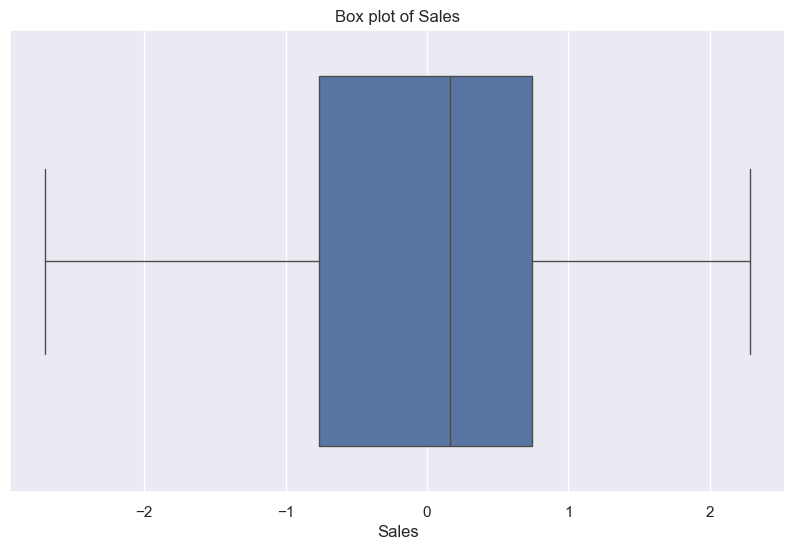

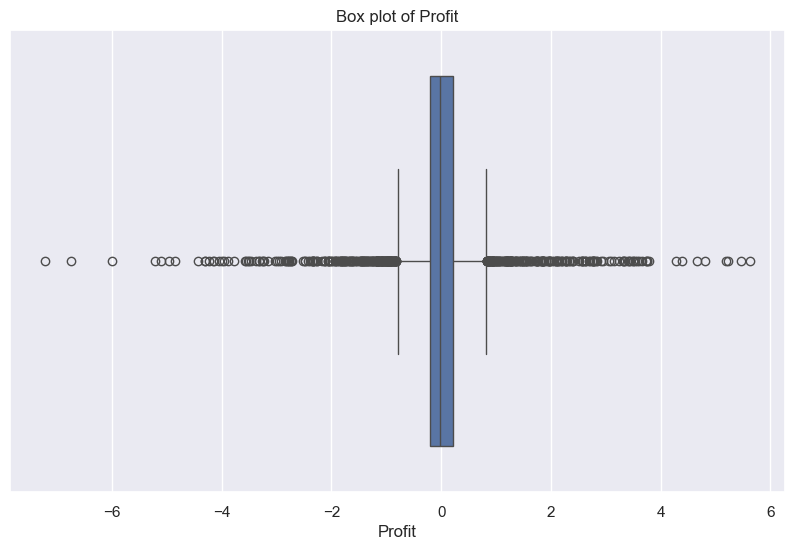

In [427]:
# Visualize numeric columns again, after cleaning

# Visualize distribution of key variables
numeric_cols = ['Order Date', 'Ship Date', 'Quantity', 'Discount', 'Sales', 'Profit']

# Set seaborn theme
sns.set_theme(style="darkgrid")

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Box plots
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

Non-numeric columns are: ship mode, segment, region, sub-category. Plot them using a histogram

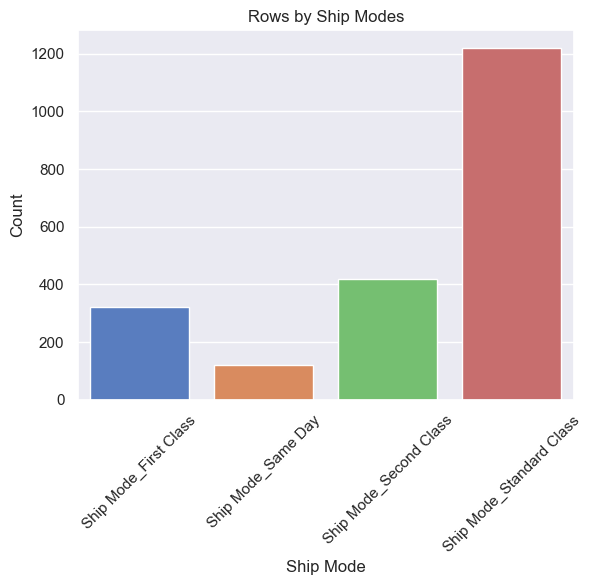

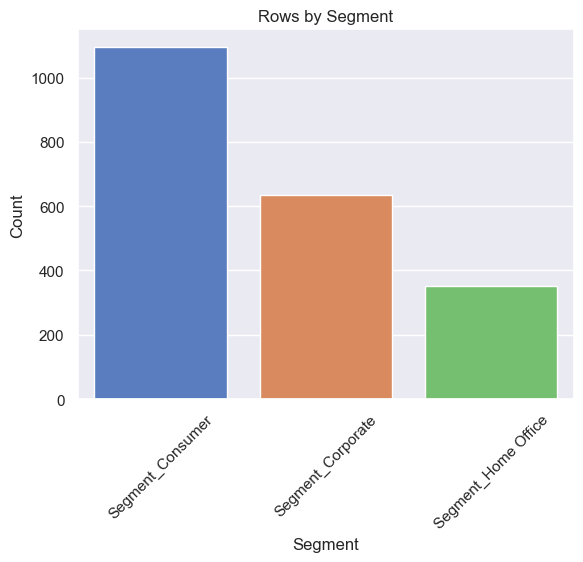

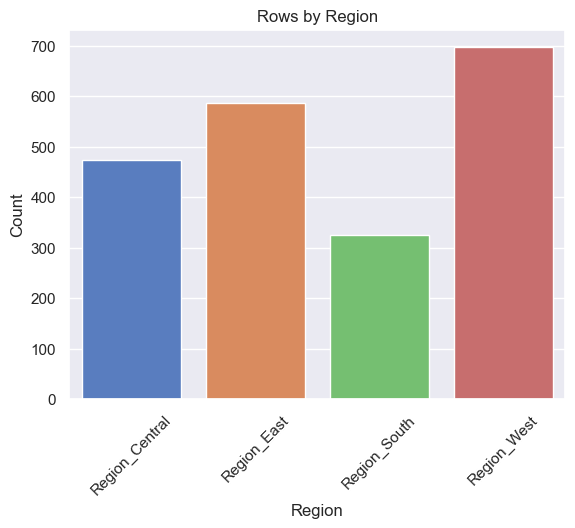

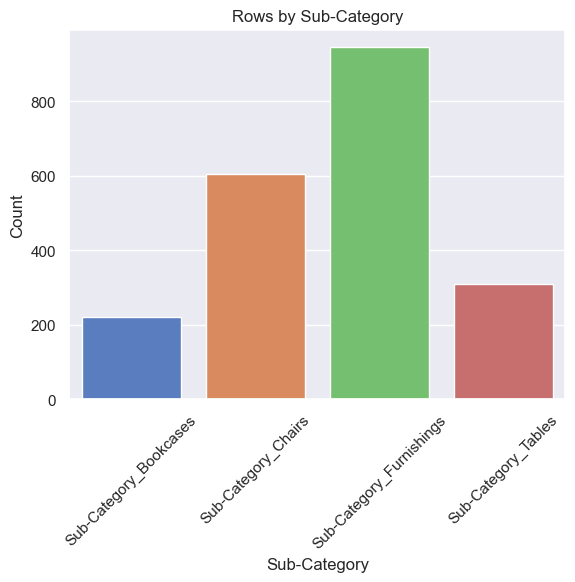

In [428]:
# Histogram of categorical variables by count
ship_mode_columns = df.filter(like='Ship Mode_')
ax = sns.barplot(x=ship_mode_columns.sum().index, y=ship_mode_columns.sum().values, palette='muted', hue=ship_mode_columns.sum().index)
ax.tick_params(axis='x', labelrotation=45)
plt.title('Rows by Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

segment_columns = df.filter(like='Segment_')
ax = sns.barplot(x=segment_columns.sum().index, y=segment_columns.sum().values, palette='muted', hue=segment_columns.sum().index)
ax.tick_params(axis='x', labelrotation=45)
plt.title('Rows by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

region_columns = df.filter(like='Region_')
ax = sns.barplot(x=region_columns.sum().index, y=region_columns.sum().values, palette='muted', hue=region_columns.sum().index)
ax.tick_params(axis='x', labelrotation=45)
plt.title('Rows by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

sub_category_columns = df.filter(like='Sub-Category_')
ax = sns.barplot(x=sub_category_columns.sum().index, y=sub_category_columns.sum().values, palette='muted', hue=sub_category_columns.sum().index)
ax.tick_params(axis='x', labelrotation=45)
plt.title('Rows by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.show()


Dataset is VERY imbalanced in ship mode, segment and sub-category, somewhat imbalanced in region.

Next, we visualize the daily changes in cumulative profit, sales, quantity sold

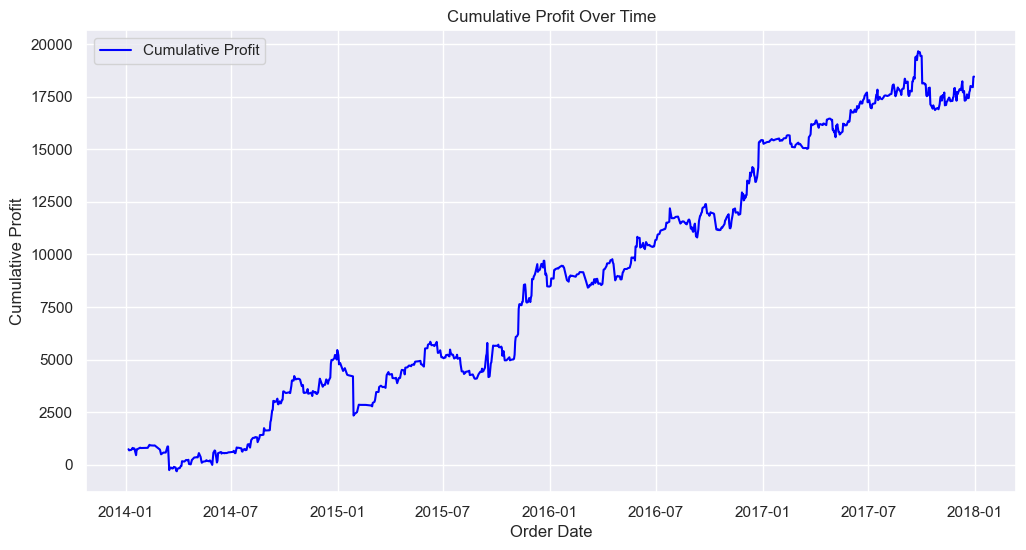

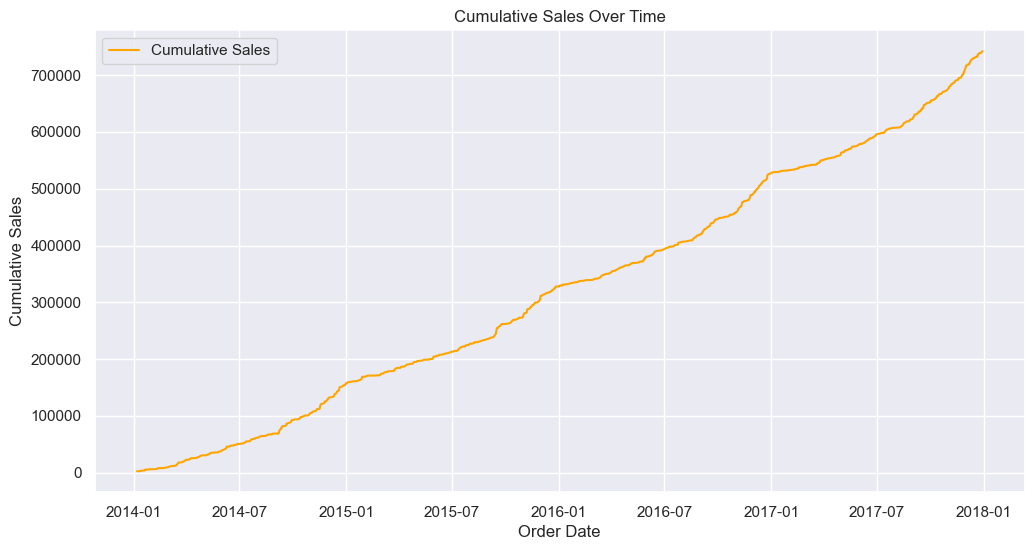

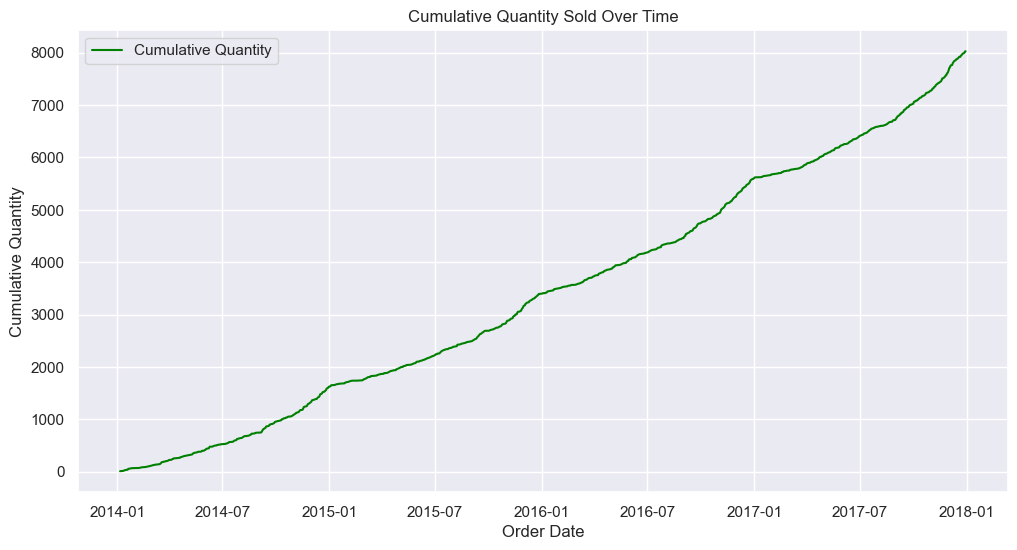

In [429]:
# Calculate cumulative profit, sales, quantity using raw unnormalized data
profit_cumsum = df_raw.groupby('Order Date')['Profit'].sum().cumsum()
sales_cumsum = df_raw.groupby('Order Date')['Sales'].sum().cumsum()
quantity_cumsum = df_raw.groupby('Order Date')['Quantity'].sum().cumsum()

# Plot cumulative profit, sales, quantity
plt.figure(figsize=(12, 6))
sns.lineplot(x=profit_cumsum.index, y=profit_cumsum.values, label='Cumulative Profit', color='blue')
plt.xlabel('Order Date')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit Over Time')
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_cumsum.index, y=sales_cumsum.values, label='Cumulative Sales', color='orange')
plt.xlabel('Order Date')
plt.ylabel('Cumulative Sales')
plt.title('Cumulative Sales Over Time')
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(x=quantity_cumsum.index, y=quantity_cumsum.values, label='Cumulative Quantity', color='green')
plt.xlabel('Order Date')
plt.ylabel('Cumulative Quantity')
plt.title('Cumulative Quantity Sold Over Time')
plt.show()

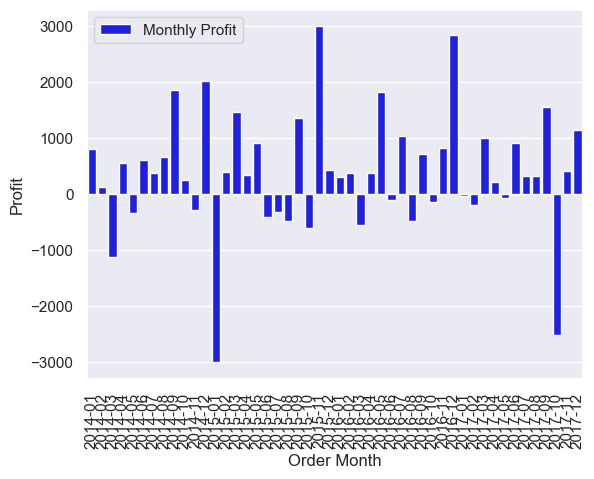

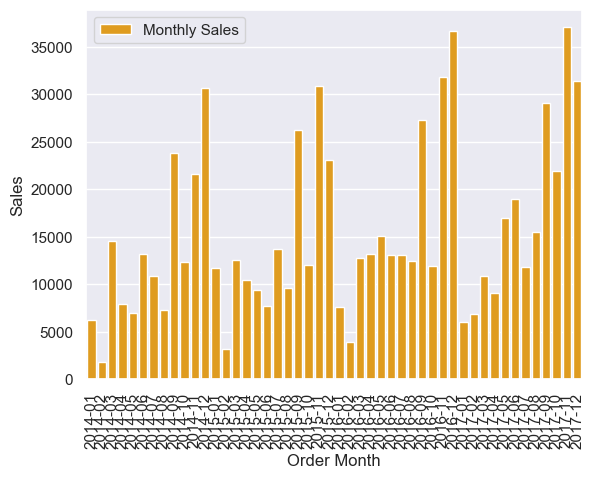

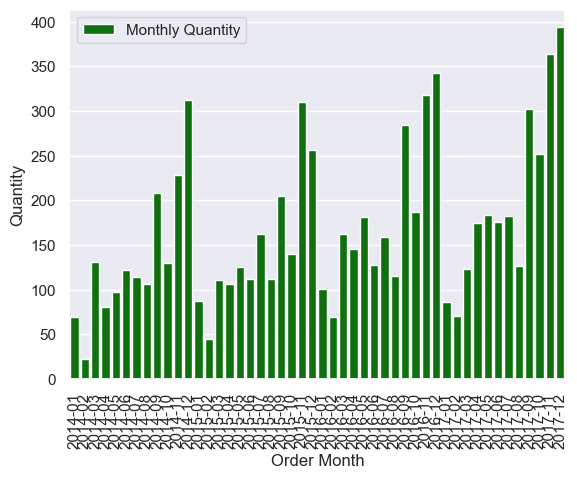

In [430]:
#Aggregate the data by month
df_agg = df_raw.copy()

# Create column for each month
df_agg['Order Month'] = df_raw['Order Date'].dt.to_period('M')

# Group by month and aggregate profit, sales, quantity
monthly_data = df_agg.groupby('Order Month').agg({'Profit': 'sum', 'Sales': 'sum', 'Quantity': 'sum'}).reset_index()
ax = sns.barplot(x=monthly_data['Order Month'], y=monthly_data['Profit'], color='blue', label='Monthly Profit')
ax.tick_params(axis='x', labelrotation=90)
plt.show()
ax = sns.barplot(x=monthly_data['Order Month'], y=monthly_data['Sales'], color='orange', label='Monthly Sales')
ax.tick_params(axis='x', labelrotation=90)
plt.show()
ax = sns.barplot(x=monthly_data['Order Month'], y=monthly_data['Quantity'], color='green', label='Monthly Quantity')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

From monthly aggregate, we see strong seasonal trend, with large quantity and sale happening at months of september, november and december, and with low sales at january and febuary.

This trend does not extend to monthly profits however.

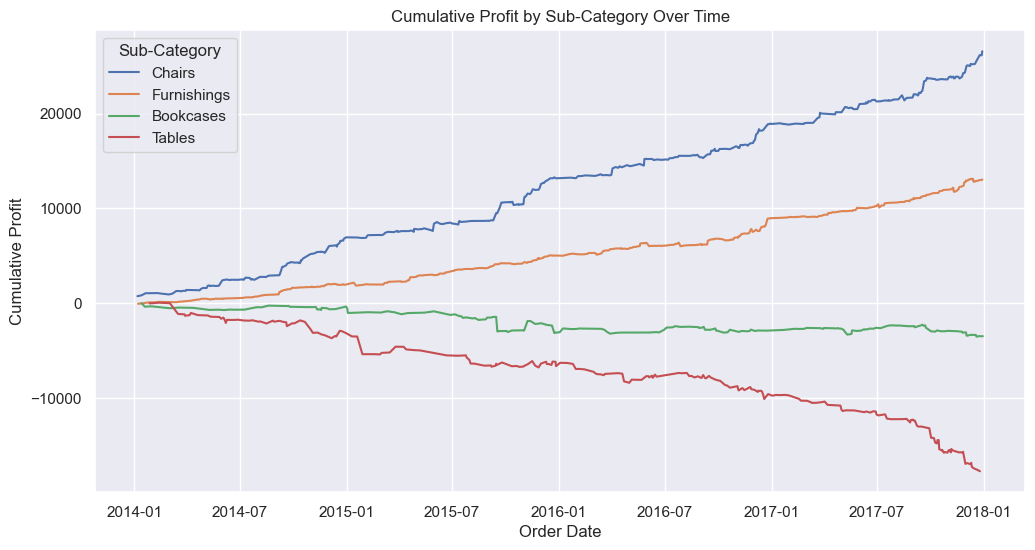

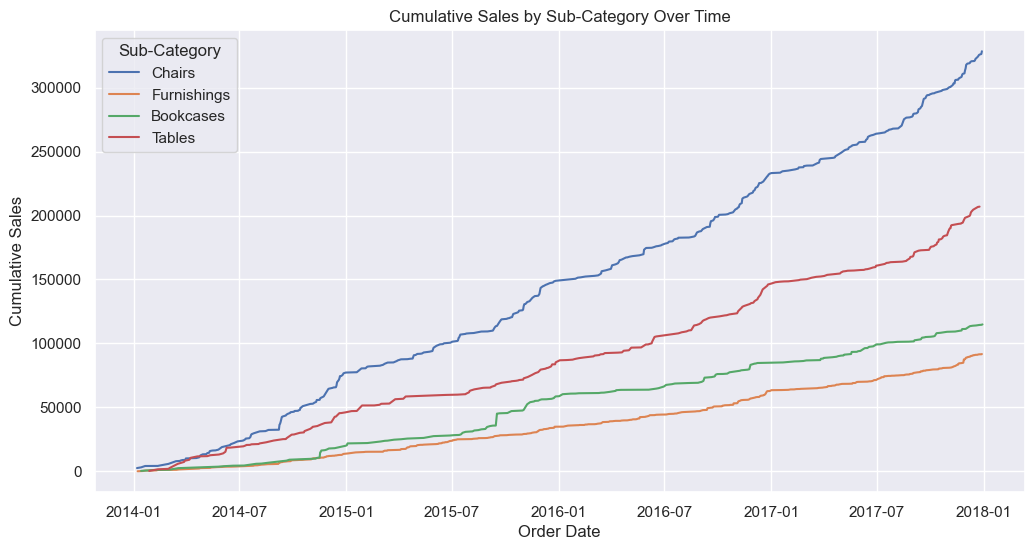

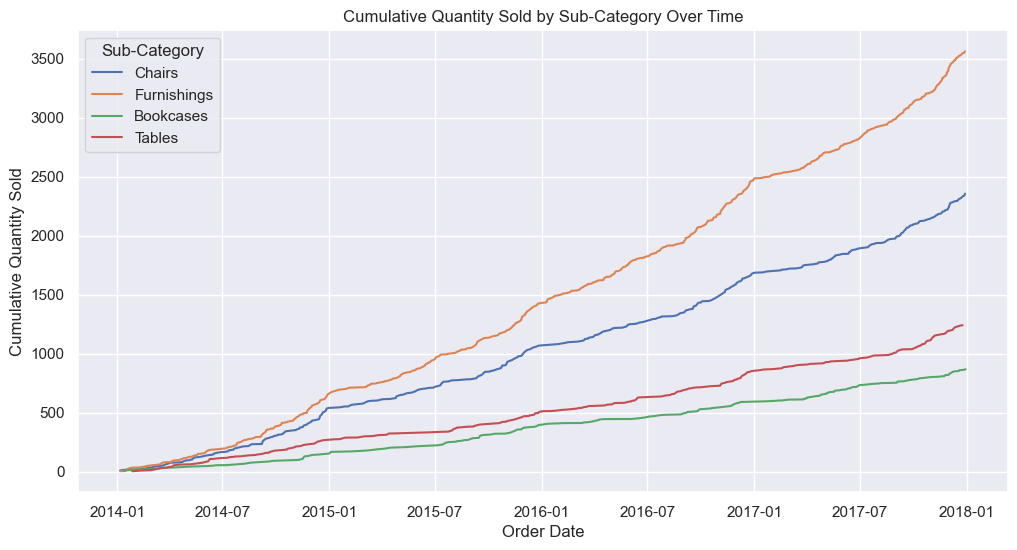

In [431]:
# Plot cumulative profit per sub-category

# Group by order date and sub-category to find daily profit, then group by sub-category to find cumulative profit
profit_cumsum_sub = df_agg.groupby(['Order Date', 'Sub-Category'])['Profit'].sum().groupby(by=['Sub-Category']).cumsum().reset_index()
# Plot cumulative profit, sales, quantity over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=profit_cumsum_sub, x='Order Date', y='Profit', hue='Sub-Category')
plt.xlabel('Order Date')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit by Sub-Category Over Time')
plt.show()

# Plot cumulative sales per sub-category
sales_cumsum_sub = df_agg.groupby(['Order Date', 'Sub-Category'])['Sales'].sum().groupby(by=['Sub-Category']).cumsum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_cumsum_sub, x='Order Date', y='Sales', hue='Sub-Category')
plt.xlabel('Order Date')
plt.ylabel('Cumulative Sales')
plt.title('Cumulative Sales by Sub-Category Over Time')
plt.show()

# Plot cumulative quantity sold per sub-category
quantity_cumsum_sub = df_agg.groupby(['Order Date', 'Sub-Category'])['Quantity'].sum().groupby(by=['Sub-Category']).cumsum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=quantity_cumsum_sub, x='Order Date', y='Quantity', hue='Sub-Category')
plt.xlabel('Order Date')
plt.ylabel('Cumulative Quantity Sold')
plt.title('Cumulative Quantity Sold by Sub-Category Over Time')
plt.show()

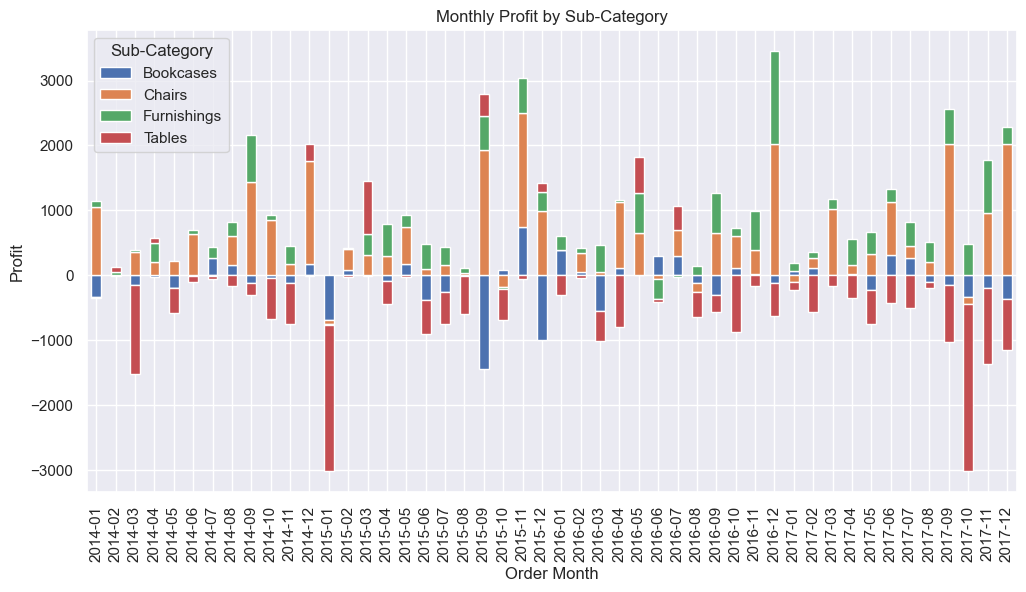

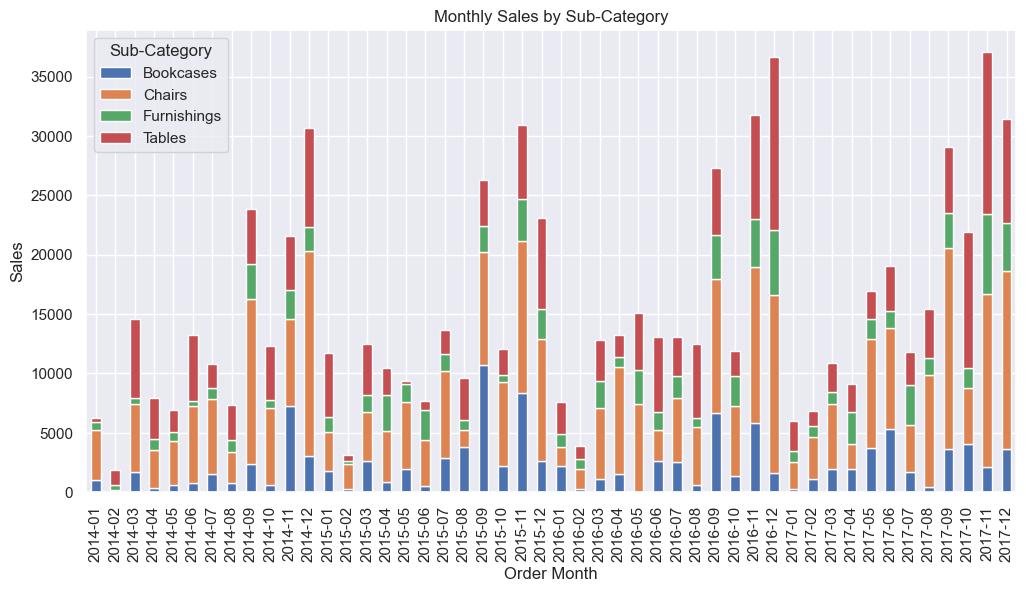

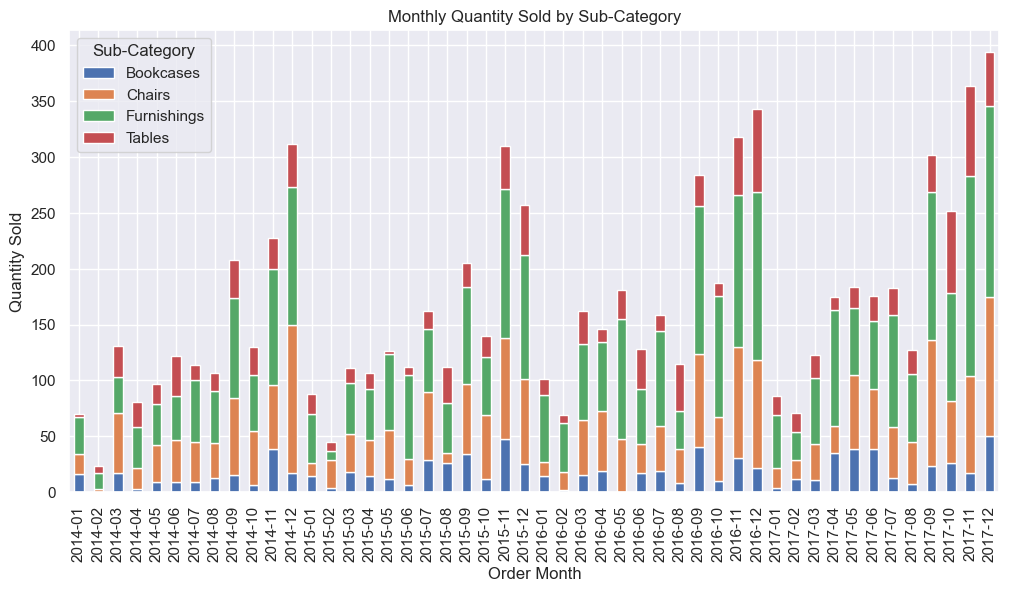

In [432]:
# Plot stacked bar chart for each sub-category for monthly trends

# Group by profit and plot
sub_category_monthly_profit = df_agg.groupby(['Order Month', 'Sub-Category'])['Profit'].sum().unstack().fillna(0)

# Plot stacked bar chart
sub_category_monthly_profit.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Profit by Sub-Category')
plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.show()

# Group by Order Month and Sub-Category, then sum Sales
sub_category_monthly_data = df_agg.groupby(['Order Month', 'Sub-Category'])['Sales'].sum().unstack().fillna(0)


sub_category_monthly_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Sales by Sub-Category')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.show()


# Group by quantity and plot
sub_category_monthly_quantity = df_agg.groupby(['Order Month', 'Sub-Category'])['Quantity'].sum().unstack().fillna(0)

sub_category_monthly_quantity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Quantity Sold by Sub-Category')
plt.xlabel('Order Month')
plt.ylabel('Quantity Sold')
plt.show()

For profit, tables almost always lost money, Chairs made the most profit, followed by furnishings. Bookcases nearly broke even, but still has negative profit.

In terms of sales amount, chairs made up the most sales, followed by tables, then bookcases and the last place is furnishing with the least sales.

In terms of quantity, furnishings sold the most, followed by chairs, bookcases and with tables being sold the least.

## 4. Identify correlated variables

To identify correlated variables, we can calculate the covariance between every variable.

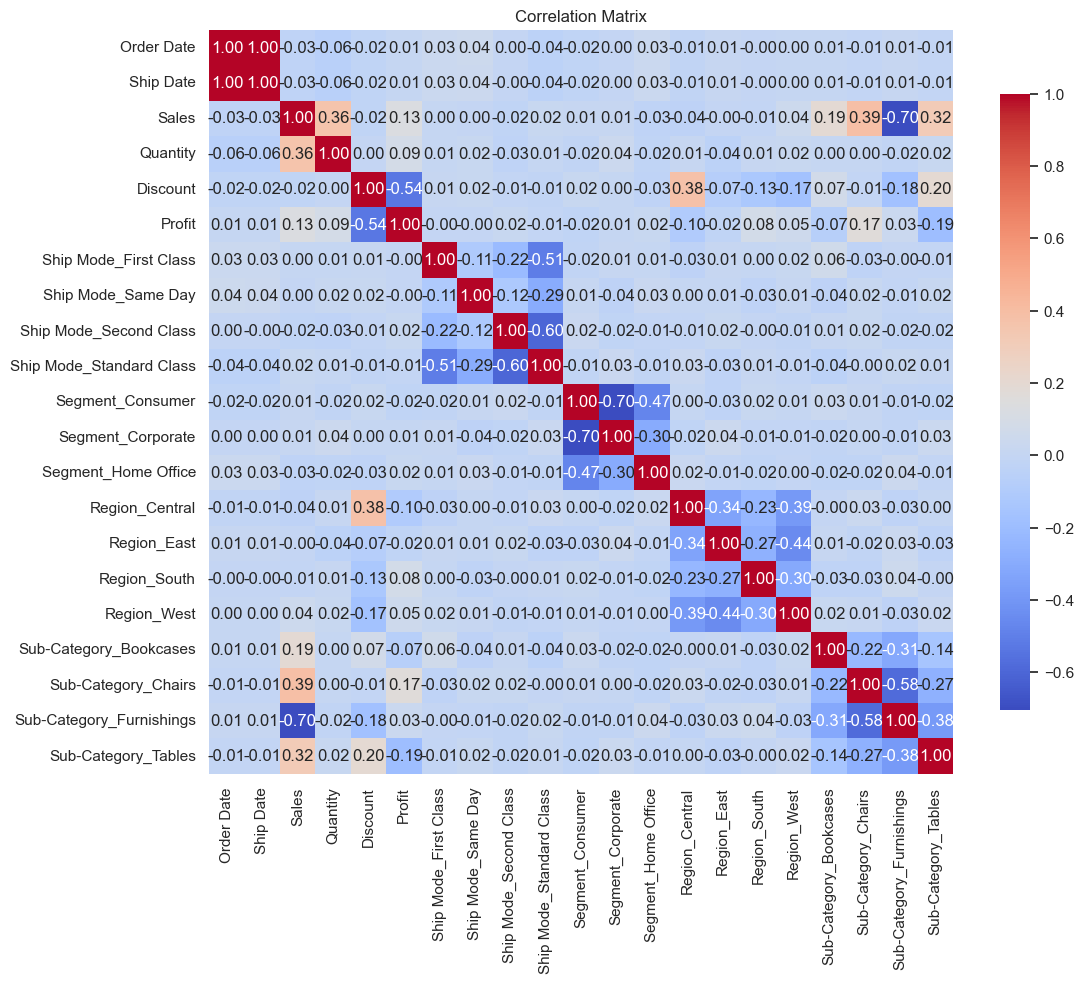

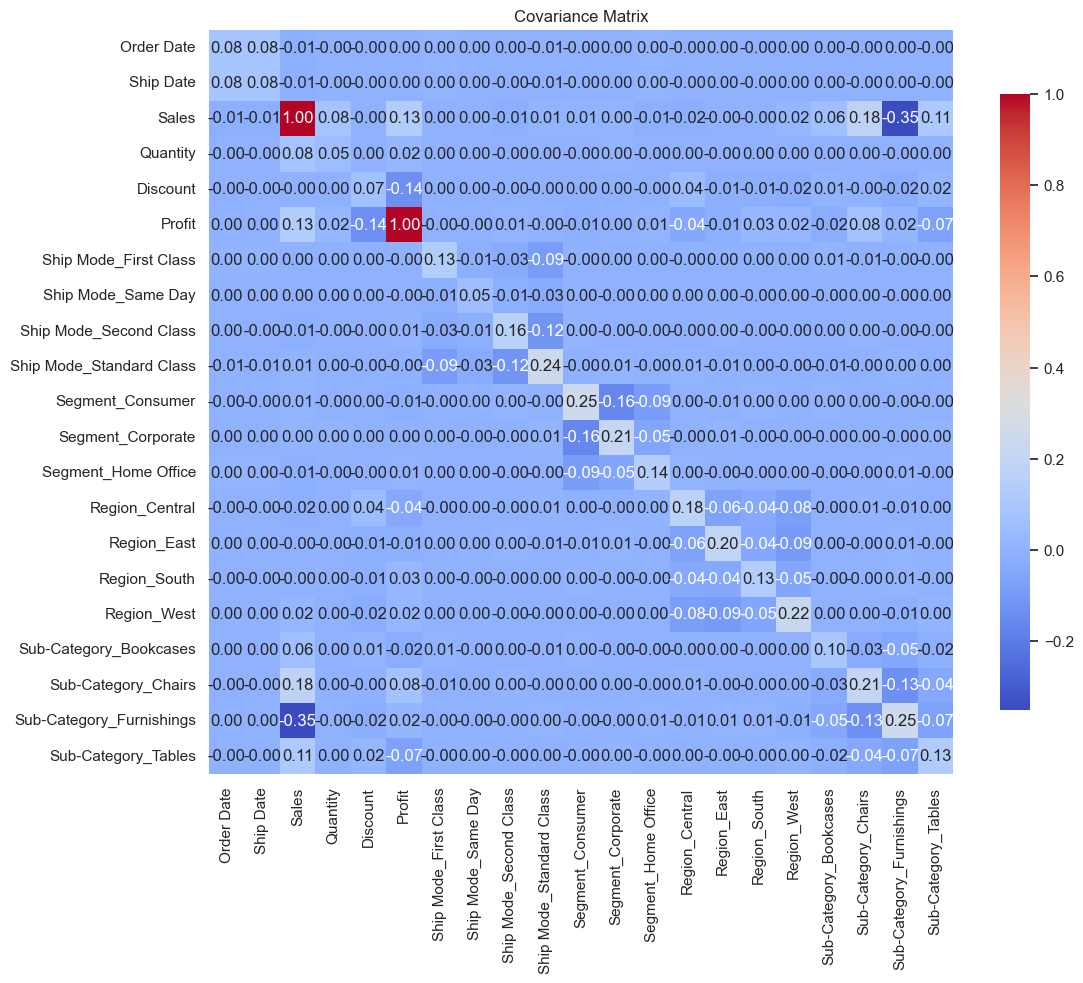

In [433]:
#Calculate correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

# Calculate covariance matrix
cov_matrix = df.cov()

plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Covariance Matrix')
plt.show()

Order date and ship date is highly correlated, as expected.

Quantity correlates positively with sales, more quantity sold leads to higher sale price.

For ship mode, segment, region and sub-category, they are negatively correlated with each other. This makes sense because of one-hot encoding, only one value can be non-zero, the rest will always be zero.

For most of these variables, no strong correlation could be found.

Interestingly, discount is correlated with region, with region_central receiving the highest discounts, while region_west have significantly lower discounts received.

Sales is also significantly correlated with sub-category, where furnishings correlates to lower sales, and chairs correlates most with higher sales amount.

Sales, quantity only have a weak correlation with profit. However discount has a negative correlation with profit, where higher discount generally leads to lower profits.

Since sub-category has the highest correlation with sales and profit, dataset will be re-sampled to have equal number of entries in each sub-category

In [438]:
# See number of rows in furnishings
df_furnishings = df[df['Sub-Category_Furnishings'] == 1]

print(df_furnishings.shape)

(945, 21)


In [445]:
# Resampling dataset to have 945 entries in each sub-category using scikit-learn

from sklearn.utils import resample

# Select each sub-category
df_bookcases = df[df['Sub-Category_Bookcases'] == 1]
df_chairs = df[df['Sub-Category_Chairs'] == 1]
df_tables = df[df['Sub-Category_Tables'] == 1]

# Resample to have 945 entries
df_bookcases_upsampled = resample(df_bookcases, replace=True, n_samples=945, random_state=42)
df_chairs_upsampled = resample(df_chairs, replace=True, n_samples=945, random_state=42)
df_tables_upsampled = resample(df_tables, replace=True, n_samples=945, random_state=42)

# Combine all dataframes
df_final = pd.concat([df_furnishings, df_bookcases_upsampled, df_chairs_upsampled, df_tables_upsampled])

# See size of the final dataframe
print(df_final.shape)
# See number of rows in each sub-category
sub_category_counts = df_final.filter(like='Sub-Category_').sum()
print(sub_category_counts)

# Shuffle the final dataframe
df_final = df_final.sample(frac=1).reset_index(drop=True)

print(df_final.head())

(3780, 21)
Sub-Category_Bookcases      945
Sub-Category_Chairs         945
Sub-Category_Furnishings    945
Sub-Category_Tables         945
dtype: int64
   Order Date  Ship Date     Sales  Quantity  Discount    Profit  \
0    0.851342   0.848693  0.528932  0.111111  0.000000  0.220921   
1    0.474191   0.473865  0.679721  0.222222  0.642857 -1.505418   
2    0.474191   0.471802  0.135843  0.000000  0.000000  0.214302   
3    0.328975   0.328061 -1.806551  0.000000  0.000000 -0.046105   
4    0.852719   0.851444 -1.576758  0.000000  0.285714 -0.083602   

   Ship Mode_First Class  Ship Mode_Same Day  Ship Mode_Second Class  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       1   
3                      0                   0                       0   
4                      0                   0                       0   

   Shi

## 5. Summary

### EDA Steps Taken:

Loaded the dataset and examined its structure, types, and unique values for each variable.
Plotted relationships between key variables (discount vs. profit, sales vs. profit) using scatter plots.
Explored the mapping between IDs and names for customers and products, discovered some many-to-many relationships for products name and ID.
Visualized distributions of numeric variables and categorical counts using histograms and box plots.
Analyzed trends in sales, profit, and quantity, both cumulatively by day and breakdown by month, and plotted trends by sub-category.


### Preprocessing:

Converted date columns to datetime and then to numerical format for modeling.
Applied one-hot encoding to important categorical variables (Ship Mode, Segment, Region, Sub-Category).
Removed outliers based on extreme values in sales, profit, and quantity.
Standardized and normalized numerical features: profit was standardized, sales was log-transformed and standardized, and other numeric columns such as date, quantity, discount were normalized.
Dropped columns that were IDs or too specific to avoid overfitting.
Upsampled sub-categories to have equal representation for each class.


### Interesting Findings:

Many-to-Many Relationship: Product IDs and Product Names does not exhibit a strictly one-to-one relationship, one ID can have multiple names and one name can have multiple IDs.
Imbalanced Data: The dataset is highly imbalanced in most categorical variables such as Ship Mode, Segment, Sub-Category.
Correlated variables: Order date and ship date are the most highly correlated. Quantity is positively correlated with sales, but both have only a weak correlation with profit. Discount is negatively correlated with profit, where higher discounts generally reduce profit.
Region and Sub-category effects: Discounts correlates by region, with the Central region receives the highest discounts. Sales and profit also vary significantly by sub-category, with chairs generating the most profit and tables often resulting in losses.
Cyclic Trends: There are strong cyclic seasonal trends in sales and quantity, with peaks in September, November, and December, however this trend does not exist for profit.
